<a href="https://colab.research.google.com/github/DACG300/Regression-Machine-Learning/blob/main/Polynomial_regression_in_Machine_Learning_Understanding_the_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial regression in Machine Learning : Understanding the Process

**Alumno:** David Alexander Cervantes Garcia

**Materia:** Machine Learning

**Docente:** Jose Antonia Aviña

>  **La Regresión Polinomial se utiliza para abordar las limitaciones de la Regresión Lineal cuando los datos muestran patrones curvos y el modelo lineal simple resulta en un bajo rendimiento (R2bajo o alto MSE). Transforma el problema en un modelo lineal sobre características transformadas, dándole la flexibilidad de una curva.**

# 2.1  Fundamentos de la técnica

 Es un tipo de regresión lineal donde la relación entre la variable de entrada (x) y la variable de salida (y) se expresa como un polinomio.

 Ajusta una línea curva en lugar de una línea recta a los puntos de datos. Esta curva representa cómo y cambia a medida que x se eleva a diferentes potencias, como x, x², x³, etc. Este enfoque es especialmente útil cuando los datos muestran un patrón que no es una línea recta, lo que indica que la relación entre x e y es más compleja que simplemente aumentar o disminuir a un ritmo constante.







# 2.2  Modelo Matemático de la técnica

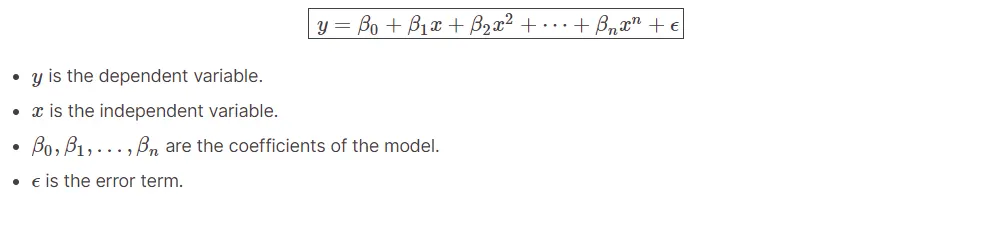

# 2.3  Descripción de la librería, clases, funciones y su parámetros  (python) empleadas en cada código

##`Librerias:`
Pandas — Para crear un marco de datos

Numpy — Para hacer informática científica

Matplotlib (pyplot y rcParams) — Para crear nuestras visualizaciones de datos

Skikit-Learn (LinearRegression, train_test_split y PolynomialFeatures) — Para realizar aprendizaje automático

## `Variables:`

Se Declara los valores de X y Y sin necesidad de un archivo externo (csv)

X: Valores de 0-40

Y: Valores de 1-201

y se muestran con un color en azul


##`Division:`

divide los datos de x e y en dos conjuntos:

Entrenamiento — se usa para ajustar el modelo.

Prueba — se usa para evaluar qué tan bien generaliza el modelo a datos nuevos.

test_size=0.2 indica que el 20% de los datos se asignan al conjunto de prueba.

random_state=42 fija la semilla aleatoria para que la división sea reproducible; cada vez que ejecutes el código obtendrás los mismos conjuntos.

#`Papiline:`

Los datos de entrada (X) y los transforma. Si el conjunto de datos tiene, variables A y se evalua en el grado de la Regresion polinomial A2, B2
y el término de interacción A×B.

LinearRegression: Este es el modelo de regresión final. Toma las características ya transformadas del paso anterior y ajusta los coeficientes.

#`Parametros:`

Exploración: GridSearchCV prueba los grados 1, 2, 3 y 4.

Evaluación: Para cada grado, divide los datos 4 veces (cv=4) y calcula el Error Cuadrático Medio (MSE) promedio.

Selección: El código elige el grado (best_degree) que resultó en el menor MSE.

Ajuste Final: Luego, se utiliza ese best_degree para transformar los datos de entrenamiento y prueba por última vez y entrenar el modelo LinearRegression definitivo (model_best).

#`Predicciones con el mejor modelo:`

predictions_train	Diagnóstico y Chequeo de Sobreajuste:

 Se utiliza para calcular el error y el R2 en el conjunto de datos que el modelo ya vio.	Si el error es muy bajo (o R2 es muy alto, cerca de 1.0).

predictions_test	Evaluación del Rendimiento Real:

 Son las predicciones clave que se comparan con los valores reales de y del conjunto de prueba (y_test).	Se utiliza para calcular las métricas finales (MSE y R2) y obtener una estimación de qué tan bien funciona el modelo con datos nuevos.

 #Evaluacion del Modelo:`

 train_error (MSE)	Mide qué tan bien predice el modelo los datos de entrenamiento.	Si es muy bajo, puede indicar sobreajuste.

 test_error (MSE)	Mide qué tan bien predice el modelo los datos de prueba. Un valor bajo indica una buena capacidad de generalización.

train_accuracy (R2)	Mide el porcentaje de la varianza de los datos de entrenamiento que el modelo explica.	Si es cercano a 1.0, el modelo ajusta casi perfectamente los datos de entrenamiento.

test_accuracy (R2)	Mide el porcentaje de la varianza de los datos de prueba que el modelo explica. Un valor alto (cercano a 1.0) significa que el modelo es robusto y útil para predecir nuevos datos.

#`Visualizacion del Modelo:`


Genera un rango de valores de X espaciados uniformemente (X_range).

Aplica la transformación polinomial óptima (poly_best.transform) a este rango.

Usa el modelo óptimo (model_best.predict) para predecir los valores de Y a lo largo de este rango.

Trazado Final: Dibuja la curva resultante (en rojo) sobre los datos. Esta línea roja representa la función matemática de Grado n que tu modelo de regresión lineal ha encontrado, mostrando visualmente la relación no lineal capturada.




# 2.4. Pipeline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

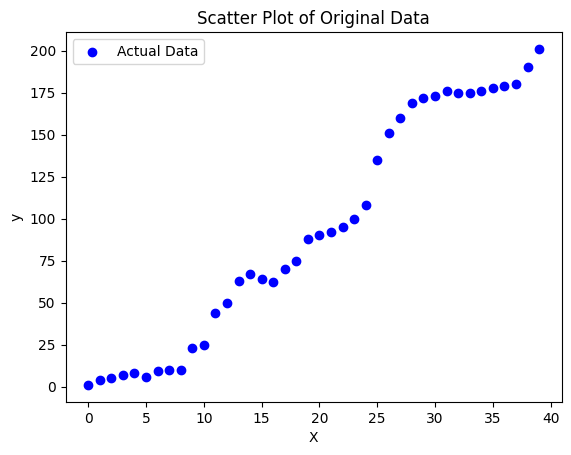

(np.int64(3),
 82.12057919191898,
 93.19555930834686,
 0.9833308707514882,
 0.9716276725394738)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(0, 40)
y = [1, 4, 5, 7, 8, 6, 9, 10, 10, 23, 25, 44, 50, 63, 67, 64, 62, 70, 75, 88, 90, 92, 95, 100, 108, 135, 151, 160, 169, 172,173,176,175,175,176,178,179,180,190,201]
# First, let's plot the original data to see the relationship between X and y

plt.scatter(X, y, color='blue', label='Actual Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of Original Data')
plt.legend()
plt.show()


# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up a pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

# Parameters for grid search

parameters = {'poly__degree': np.arange(1, 5)}

grid_search = GridSearchCV(pipeline, parameters, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train.reshape(-1,1), y_train)

best_degree = grid_search.best_params_['poly__degree']


poly_best = PolynomialFeatures(degree=best_degree)
X_poly_train_best = poly_best.fit_transform(X_train.reshape(-1,1))
X_poly_test_best = poly_best.transform(X_test.reshape(-1,1))

model_best = LinearRegression()
model_best.fit(X_poly_train_best, y_train)

# Making predictions with the best model
predictions_train = model_best.predict(X_poly_train_best)
predictions_test = model_best.predict(X_poly_test_best)

# Evaluating the model
train_error = mean_squared_error(y_train, predictions_train)
test_error = mean_squared_error(y_test, predictions_test)
train_accuracy = r2_score(y_train, predictions_train)
test_accuracy = r2_score(y_test, predictions_test)


best_degree, train_error, test_error, train_accuracy, test_accuracy

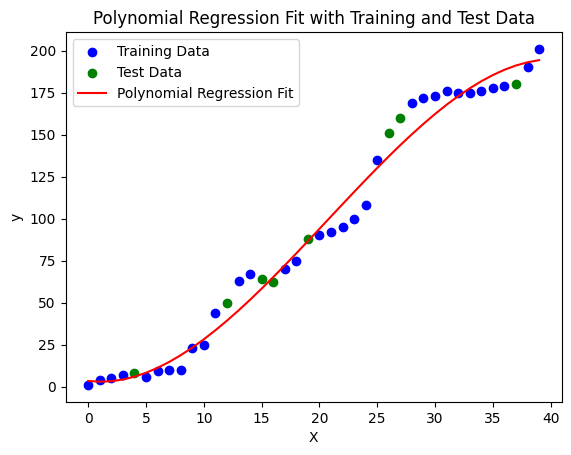

In [ ]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')

X_range = np.arange(0, 40).reshape(-1,1)
X_range_poly = poly_best.transform(X_range)

predictions_range = model_best.predict(X_range_poly)

# Plotting the polynomial regression fit
plt.plot(X_range, predictions_range, color='red', label='Polynomial Regression Fit')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit with Training and Test Data')
plt.legend()
plt.show()